데이터 준비하기

In [ ]:
# 외부 라이브러리 import
# 데이터 시각화를 위한 라이브러리 import
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# save_image()를 위한 plotly 설치
!pip install plotly==4.4.1
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

In [ ]:
# 한글 깨짐 방지
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

In [4]:
# 데이터 읽어오기
df_patient = pd.read_csv('/content/PatientInfo.csv')

In [46]:
# 데이터 파악하기
df_patient.head(3)

,patient_id,global_num,gender,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,57.0,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,34.0,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,57.0,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released


In [ ]:
df_patient.tail(3)

In [ ]:
df_patient.info()

데이터 결측치 확인

In [ ]:
# isna() 결측치가 있니?라고 묻는 함수 -> 있기 때문에 True 반환
df_patient.isna().sum()

나이 (age) -> 20s -> 23 정확하게 숫자로 변경 -> 현재년도 - 태어난 년도(birth_year)<br>
1. Nan 데이터를 처리 (Nan 계산이 불가) -> 0으로 채우자
2. 나이 계산시, 0 보다 큰 값은 (현재년도 - 태어난년도) 0 보다 작으면 다시 Nan 채우기

In [ ]:
df_patient['birth_year'] = df_patient.birth_year.fillna(0.0).astype(int)
df_patient.tail()

In [ ]:
# birth_year에서 Nan의 갯수가 변함
df_patient.isna().sum()

In [11]:
# 0보다 큰 값은 그대로 사용하고, 0인 값은 Nan으로 변환 -> 나이 계산시 2021살 방지
df_patient['birth_year'] = df_patient['birth_year'].map(lambda val : val if val > 0 else np.nan) # lambda

In [ ]:
df_patient['age'] = 2021 - df_patient['birth_year']
df_patient.tail()

In [13]:
# 전처리한 데이터 patient 변수에 담기
patient = df_patient

2. 격리해제자(released) 데이터

In [ ]:
# 격리해제자 정보 담기
released = patient[patient.state == 'released']
released.head()

격리해제자들의 연령대 분석

In [ ]:
# 격리해제자들의 연령대 분포
plt.figure(figsize=(10,5), dpi=150)
sns.set_style('darkgrid')
plt.title('Age distribution of the released')
sns.kdeplot(data=released['age'], shade = True)

3. 격리된(isolated) 환자 데이터

In [ ]:
# 격리된 환자의 정보 담기
isolated_state = patient[patient.state == 'isolated']
isolated_state.info()

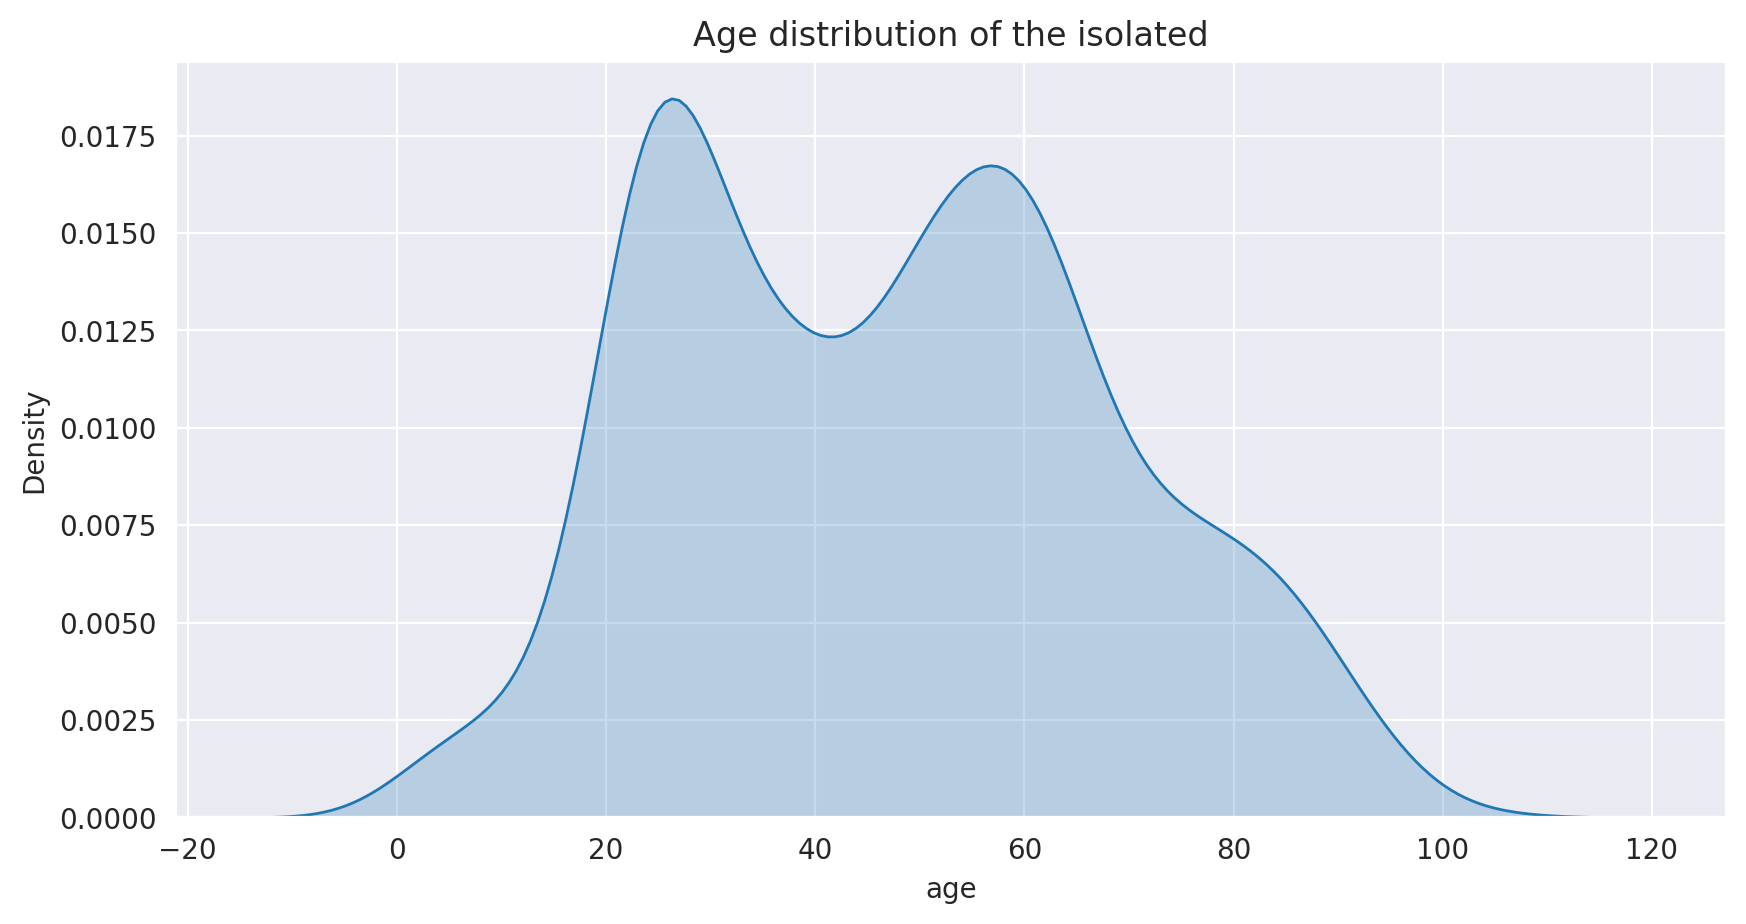

In [34]:
# 격리자들의 연령대 분포
plt.figure(figsize=(10,5), dpi=100)
sns.set_style('darkgrid')
plt.title('Age distribution of the isolated')
sns.kdeplot(data=isolated_state['age'], shade = True)

4. 사망자(deceased) 데이터

In [47]:
# 사망자의 정보
dead = patient[patient.state == 'deceased']
dead.head()

,patient_id,global_num,gender,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
108,1000000109,6773.0,male,1929.0,92.0,Korea,Seoul,etc,NaN,contact with patient,NaN,NaN,NaN,2020-03-02,2020-03-07,NaN,NaN,deceased
284,1000000285,8602.0,male,1976.0,45.0,Korea,Seoul,Mapo-gu,NaN,Guro-gu Call Center,NaN,NaN,NaN,NaN,2020-03-19,NaN,NaN,deceased
703,1100000071,NaN,male,1941.0,80.0,Korea,Busan,Busanjin-gu,NaN,etc,NaN,NaN,1.0,2020-02-28,2020-02-28,NaN,NaN,deceased
727,1100000095,NaN,female,1932.0,89.0,Korea,Busan,etc,NaN,NaN,NaN,NaN,24.0,2020-02-15,2020-03-13,NaN,NaN,deceased
729,1100000097,NaN,male,1947.0,74.0,Korea,Busan,Busanjin-gu,NaN,etc,NaN,NaN,11.0,2020-03-09,2020-03-13,NaN,NaN,deceased


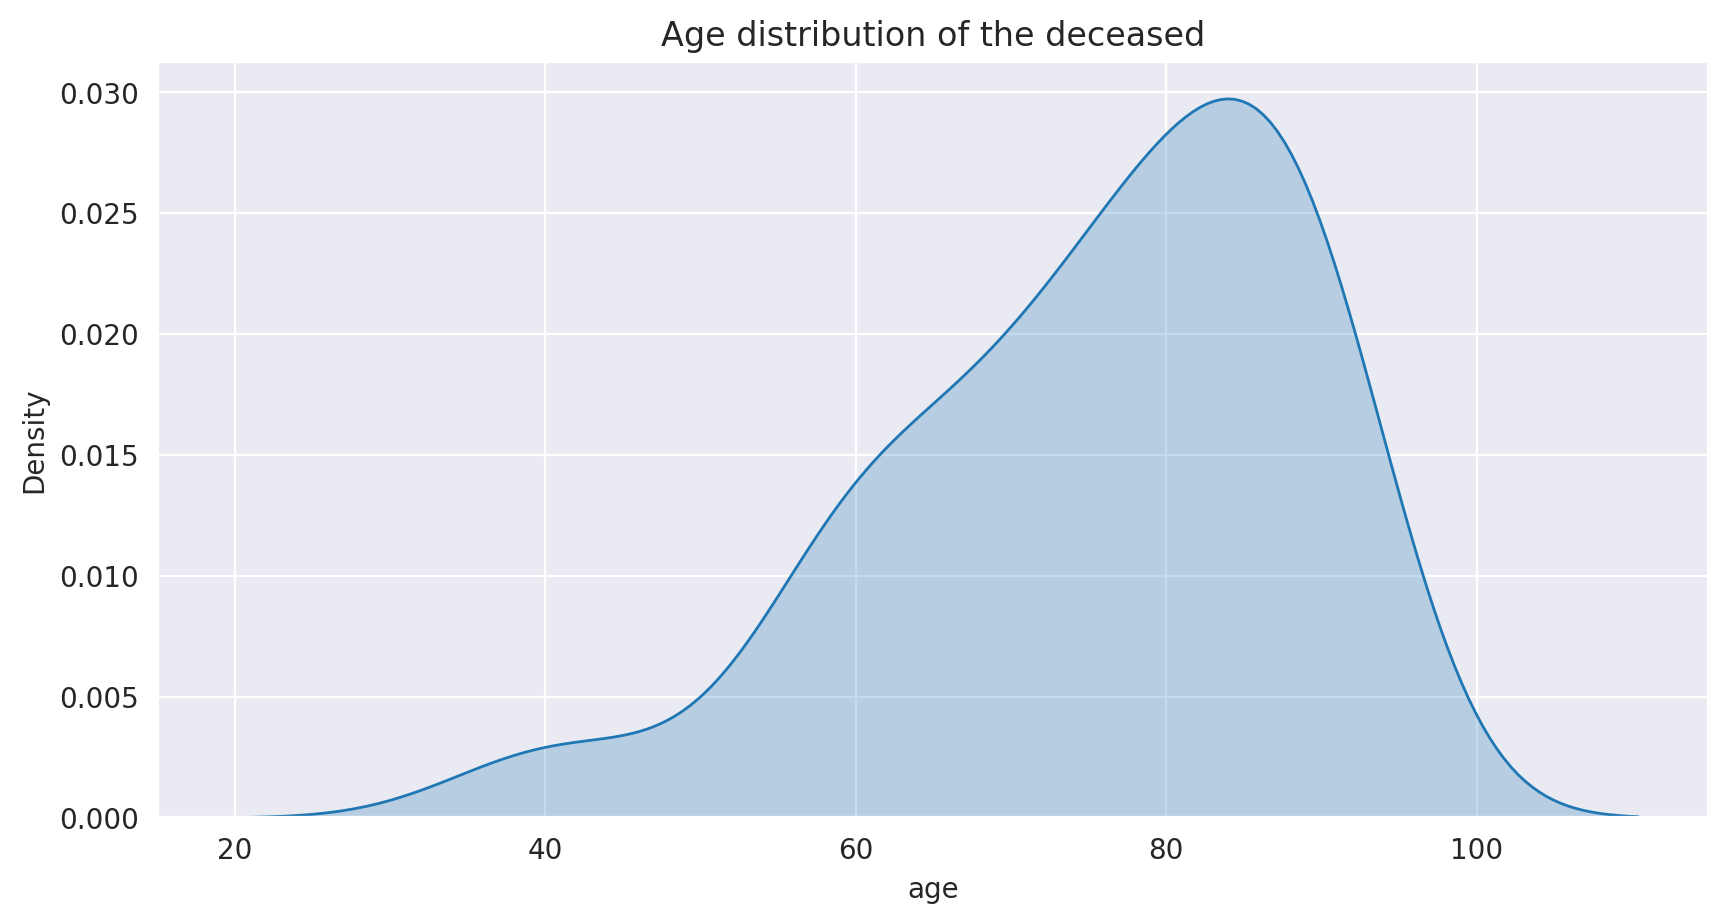

In [36]:
# 사망자들의 연령대 분포
plt.figure(figsize=(10,5), dpi=100)
sns.set_style('darkgrid')
plt.title('Age distribution of the deceased')
sns.kdeplot(data=dead['age'], shade = True)

5. 사망자에 따른 성별(gender) 데이터

In [26]:
# 사망자에 따른 성별(gender) 데이터 분리하여, 변수에  담기 (male_dead, female_dead)
male_dead = dead[dead.gender == 'male']
female_dead = dead[dead.gender == 'female']

In [27]:
# 데이터 확인하기
print(male_dead.info())
print(female_dead.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 108 to 3154
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          44 non-null     int64  
 1   global_num          39 non-null     float64
 2   gender              44 non-null     object 
 3   birth_year          42 non-null     float64
 4   age                 42 non-null     float64
 5   country             44 non-null     object 
 6   province            44 non-null     object 
 7   city                31 non-null     object 
 8   disease             13 non-null     object 
 9   infection_case      20 non-null     object 
 10  infection_order     0 non-null      float64
 11  infected_by         0 non-null      float64
 12  contact_number      2 non-null      float64
 13  symptom_onset_date  5 non-null      object 
 14  confirmed_date      44 non-null     object 
 15  released_date       0 non-null      object 
 16  deceas

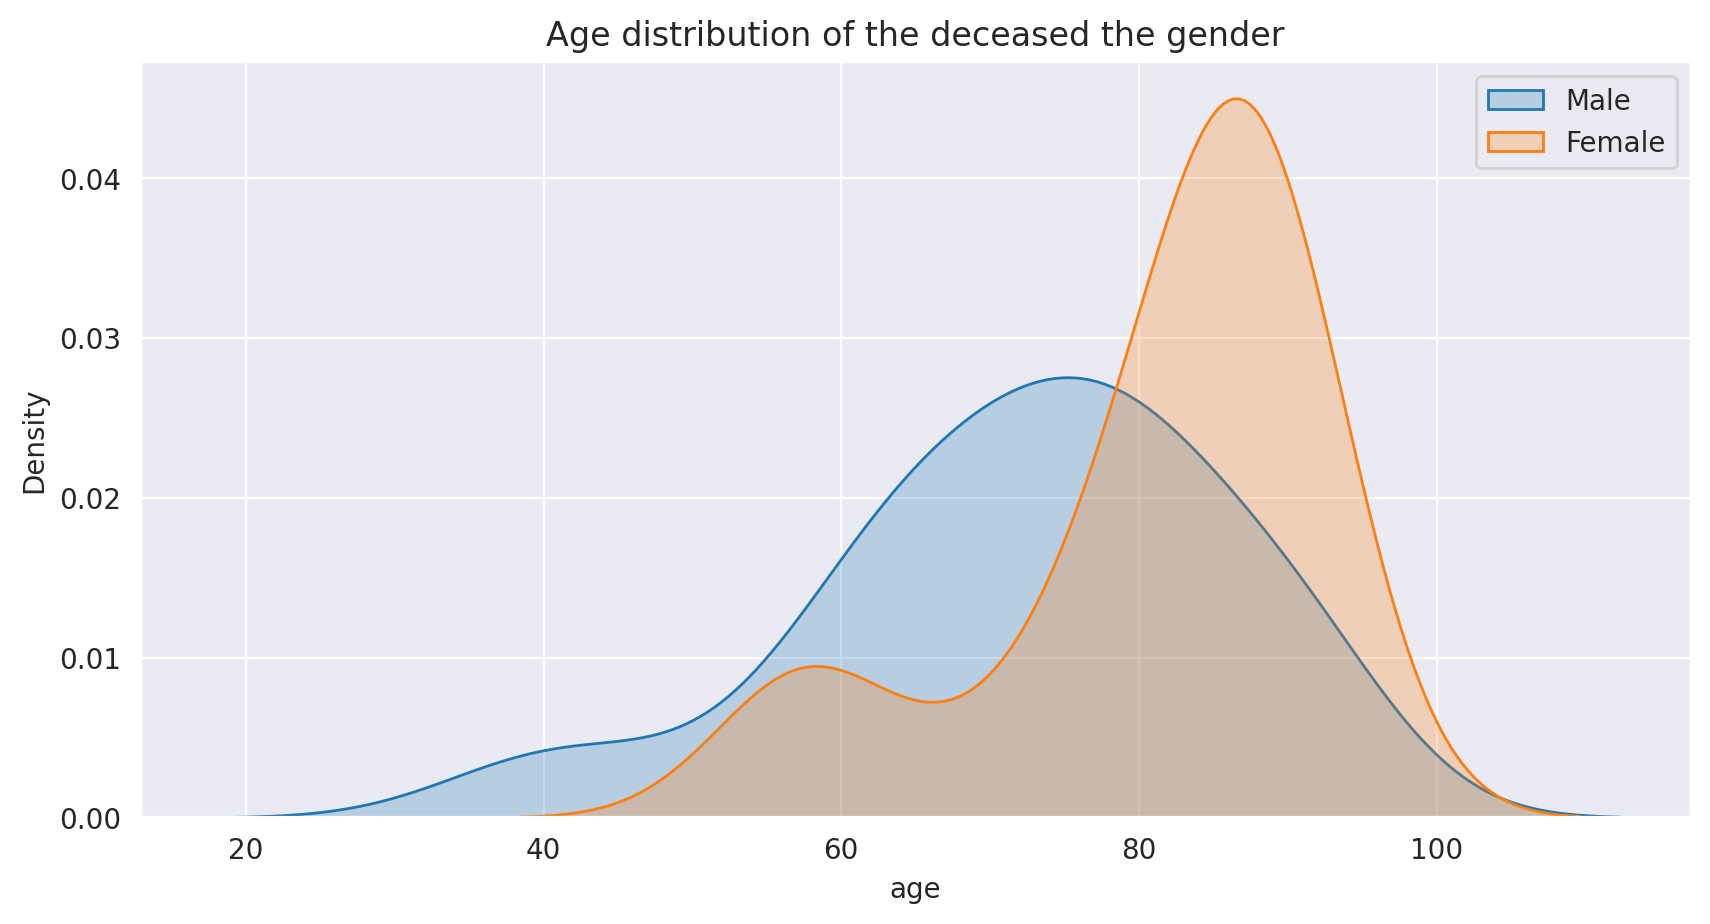

In [28]:
# 성별에 따른 사망자의 연령분포 - kdeplot 사용
plt.figure(figsize=(10,5), dpi=100)
sns.set_style('darkgrid')
plt.title('Age distribution of the deceased the gender')
sns.kdeplot(data = male_dead['age'], label='Male', shade=True)
sns.kdeplot(data = female_dead['age'], label='Female', shade=True)
plt.legend()

KDE : Kernel Density Estimator 추가한 distplot()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



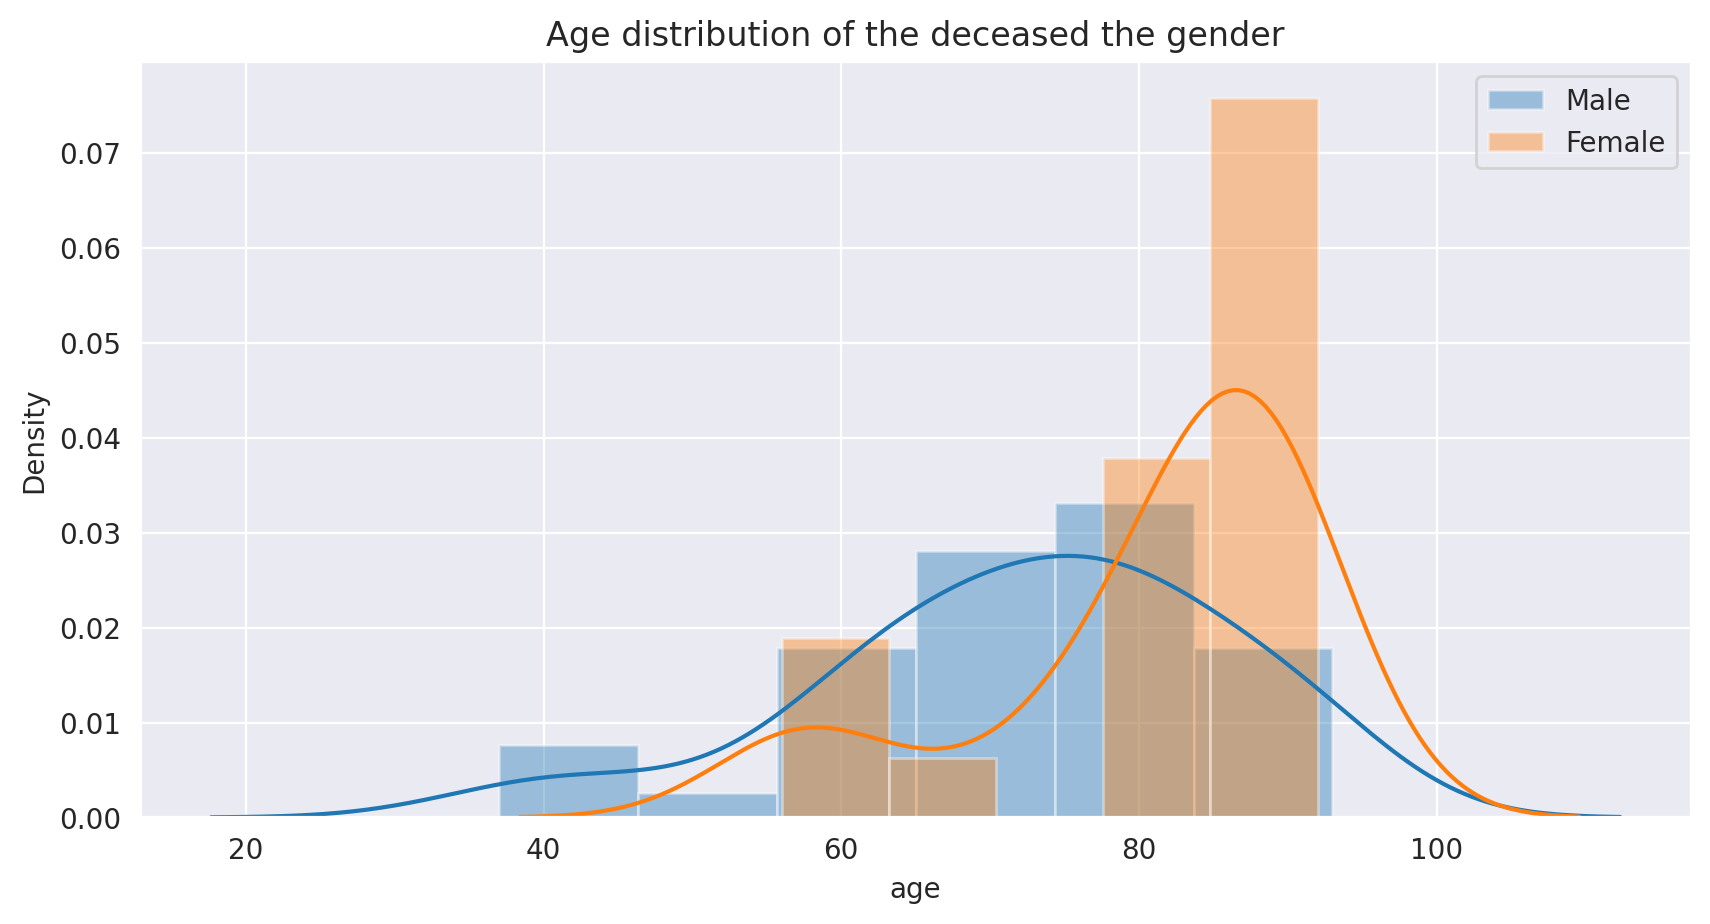

In [29]:
# 사망자에 따른 성별(gender) 연령분포 - displot 사용
plt.figure(figsize=(10,5), dpi=100)
sns.set_style('darkgrid')
plt.title('Age distribution of the deceased the gender')
sns.distplot(a=male_dead['age'], label='Male', kde=True)
sns.distplot(a=female_dead['age'], label='Female', kde=True)
plt.legend()

사망자 성별 비교 - 비교 순서 : 바차트, 파이차트 -> 분포

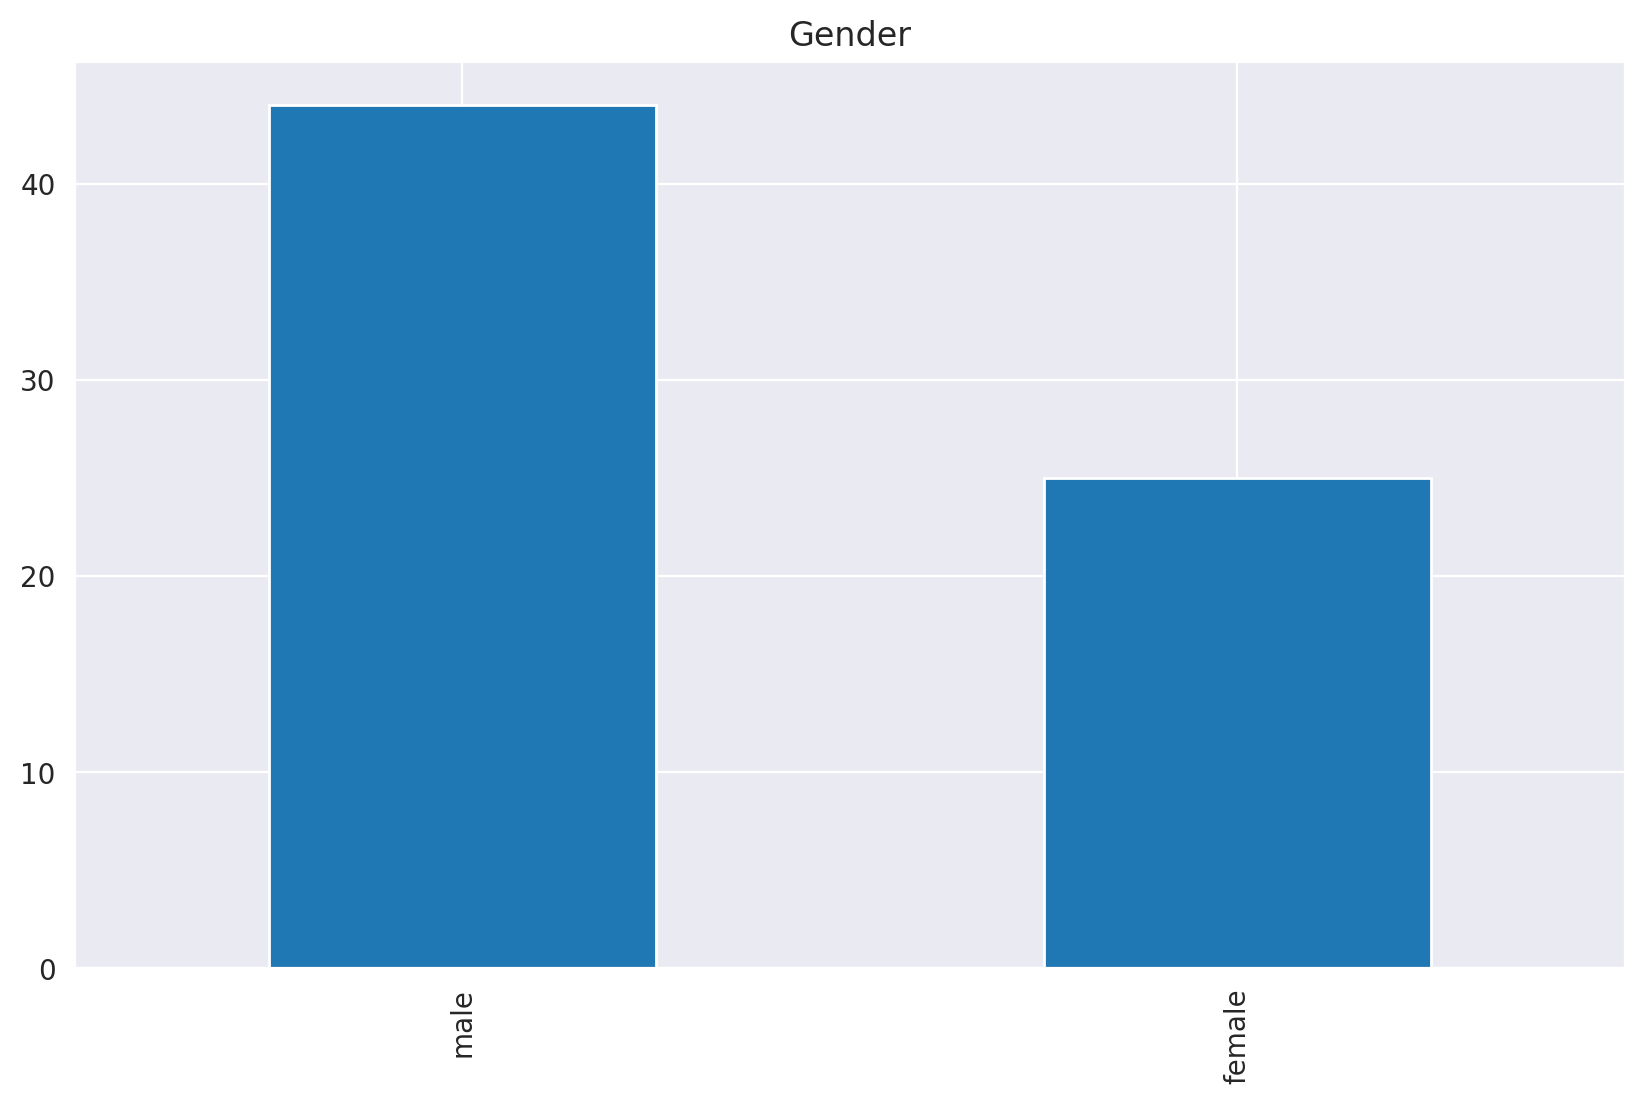

In [30]:
# 사망자 성별 비교 - 바 차트
plt.figure(figsize=(10,6), dpi=100)
plt.title('Gender')
dead.gender.value_counts().plot.bar()

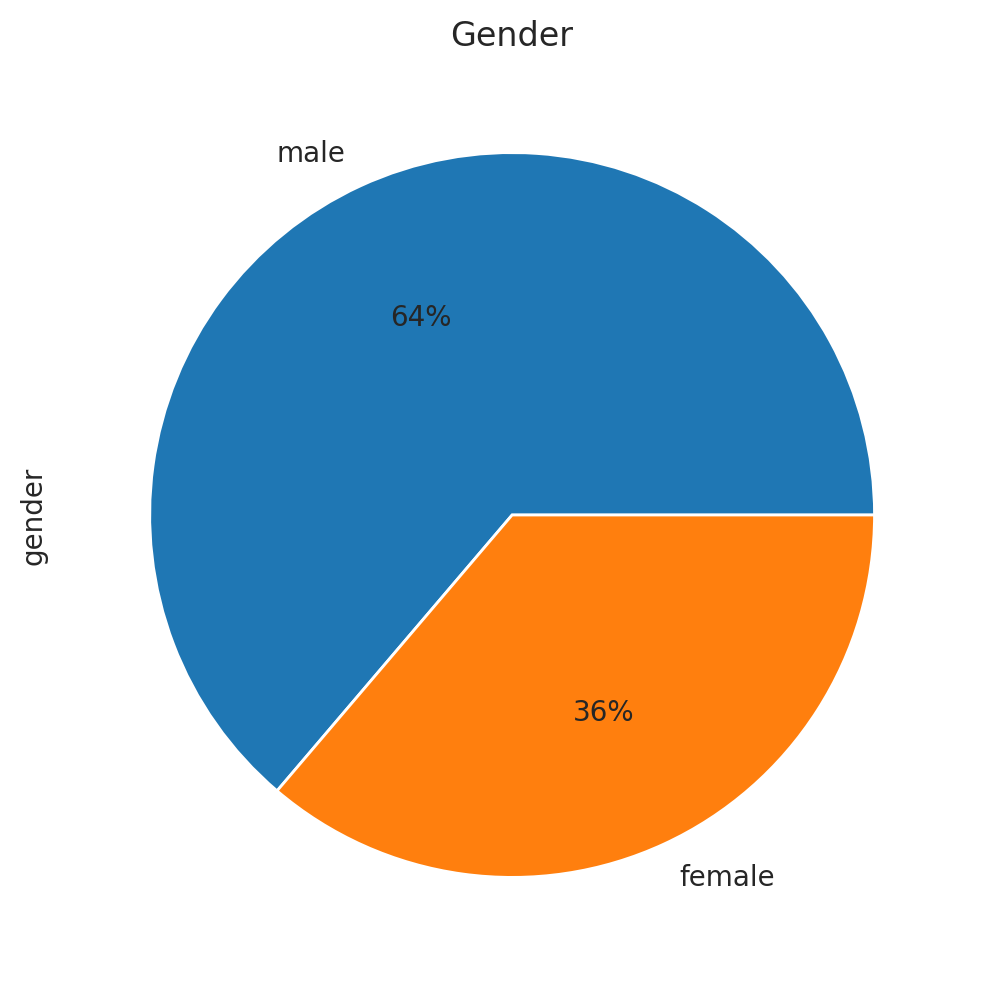

In [31]:
# 사망자 성별 비교 - pie 차트
plt.figure(figsize=(10,6), dpi=100)
plt.title('Gender')
dead.gender.value_counts().plot.pie(autopct='%1.f%%')

환자 유형별 (격리해제자, 격리 중인 환자, 사망자) 연령 분포

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 8722 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 8722 missing from current font.



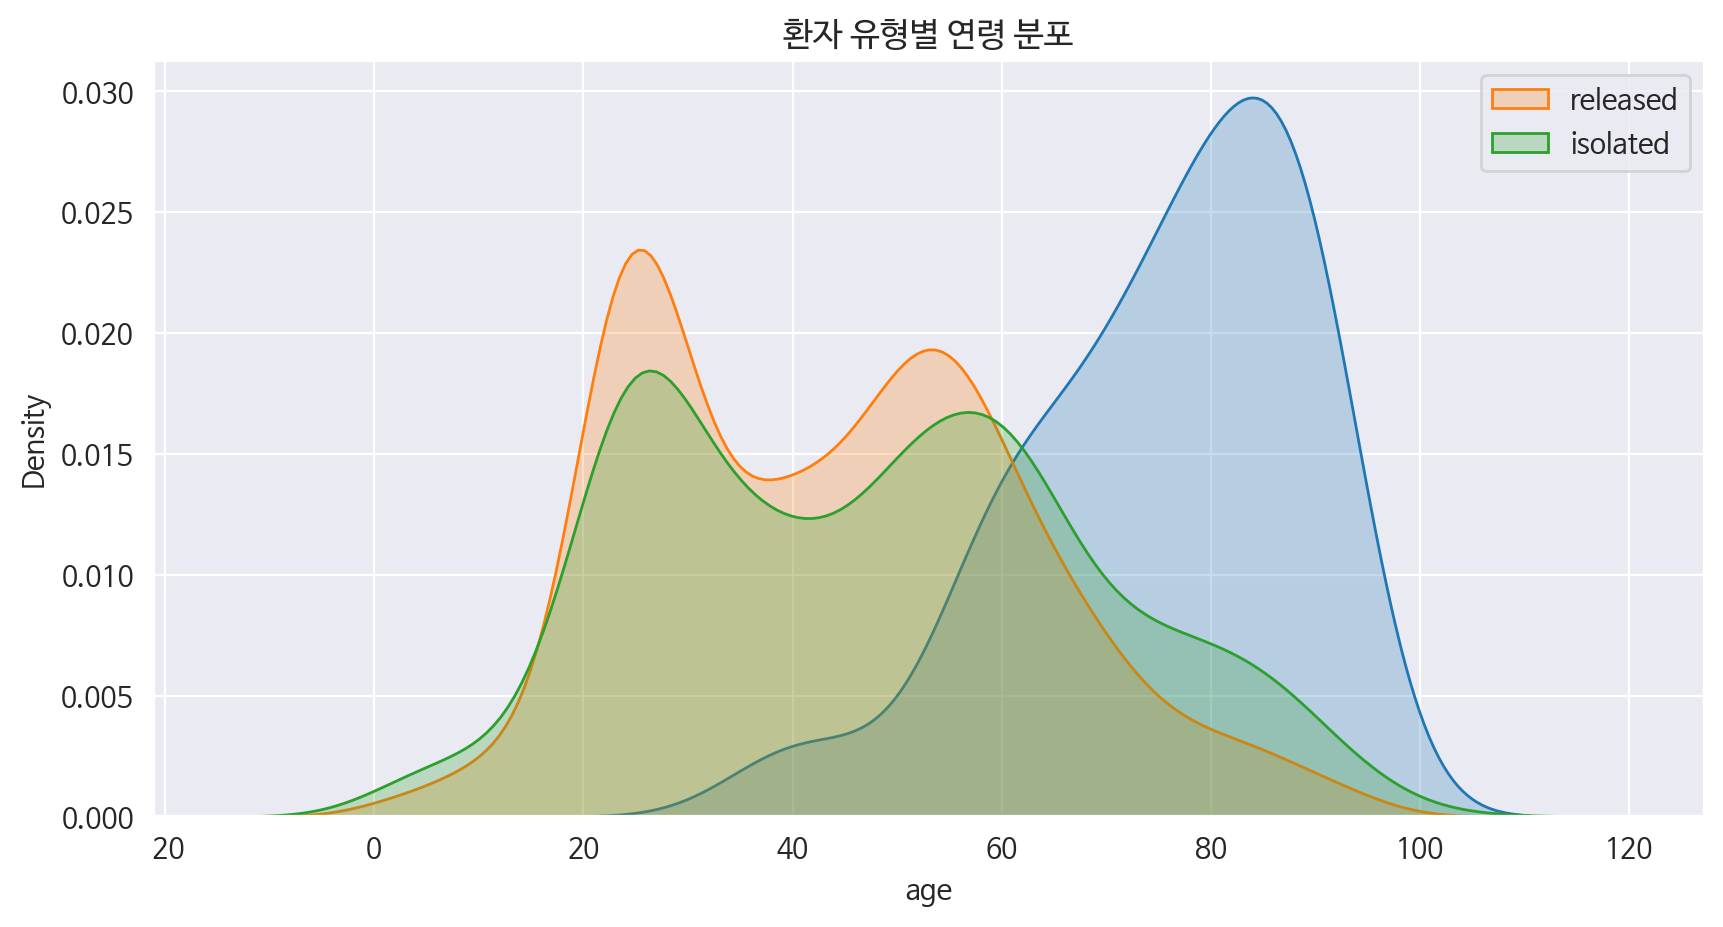

In [32]:
plt.figure(figsize=(10,5), dpi=100)
sns.set_style('darkgrid')
plt.rc('font', family='NanumBarunGothic')
plt.title('환자 유형별 연령 분포')
sns.kdeplot(data = dead['age'], shade = True)
sns.kdeplot(data = released['age'], label='released', shade=True)
sns.kdeplot(data = isolated_state['age'], label='isolated', shade=True)
plt.legend()

환자 유형별 (격리해제자, 격리 중인 환자, 사망자) 비율

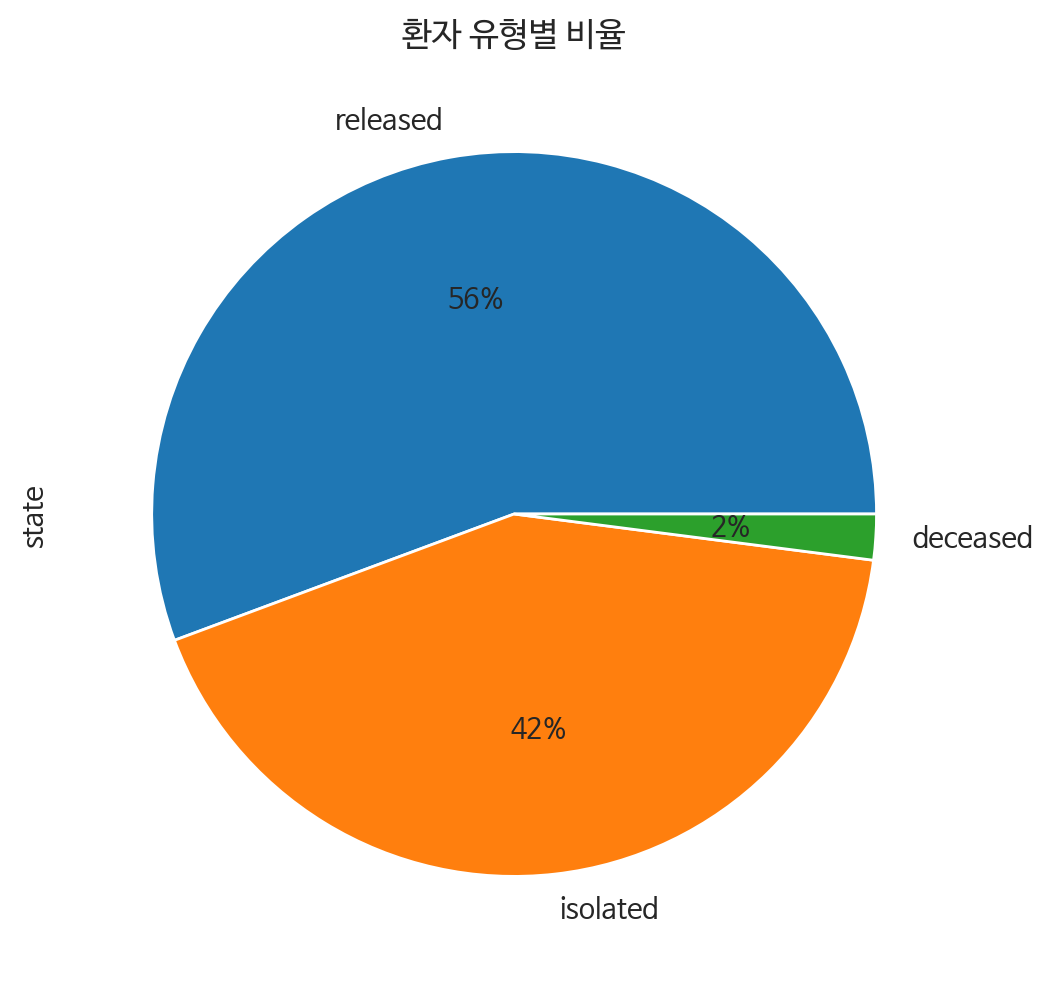

In [33]:
plt.figure(figsize=(10,6), dpi=100)
plt.rc('font', family='NanumBarunGothic')
plt.title('환자 유형별 비율')
patient.state.value_counts().plot.pie(autopct='%1.f%%')

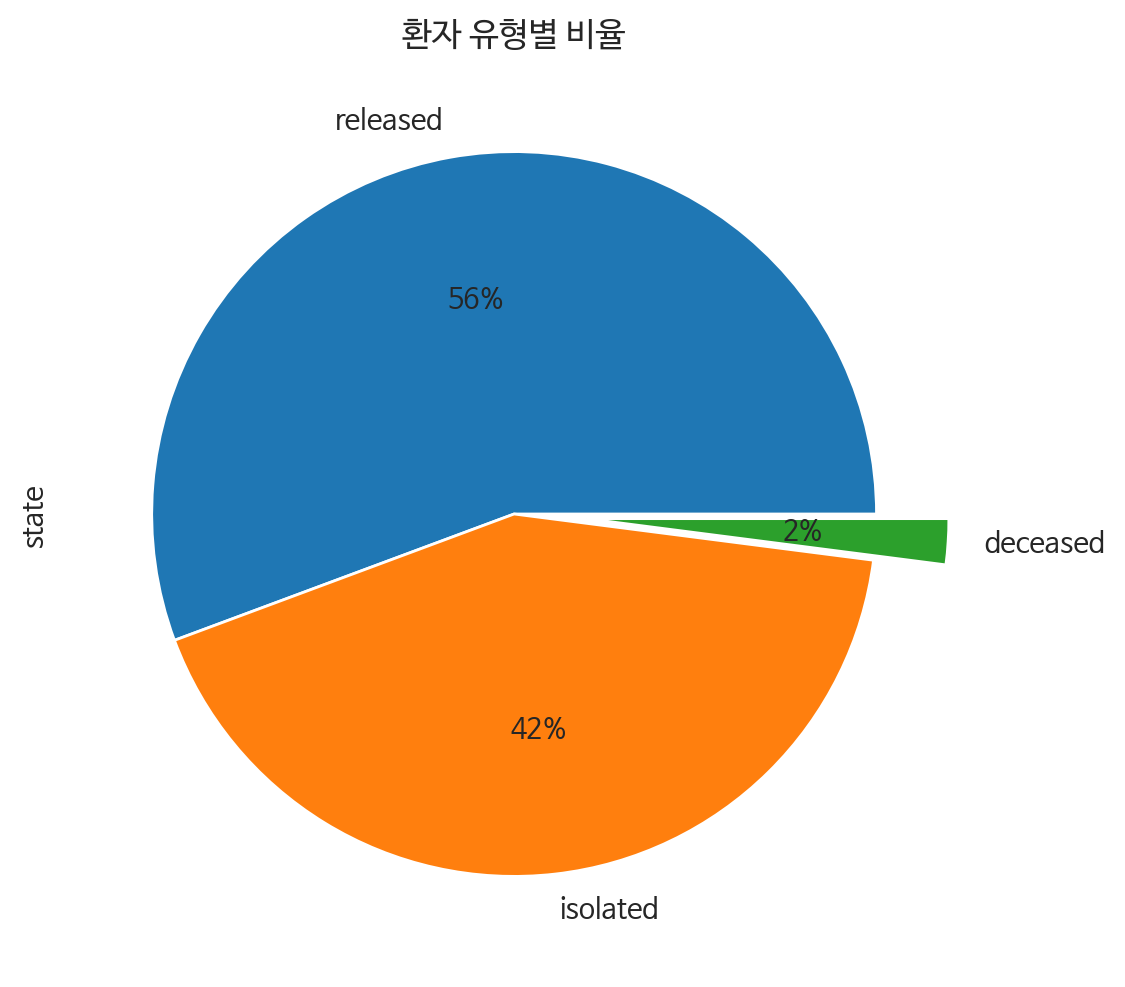

In [57]:
# 사망자 수 강조 # explode 속성 이용
plt.figure(figsize=(10,6), dpi=100)
plt.rc('font', family='NanumBarunGothic')
plt.title('환자 유형별 비율')
patient.state.value_counts().plot.pie(explode=[0,0,0.2], autopct='%1.f%%')
plt.show()

성별, 날짜별 사망자 수 꺾은선 그래프


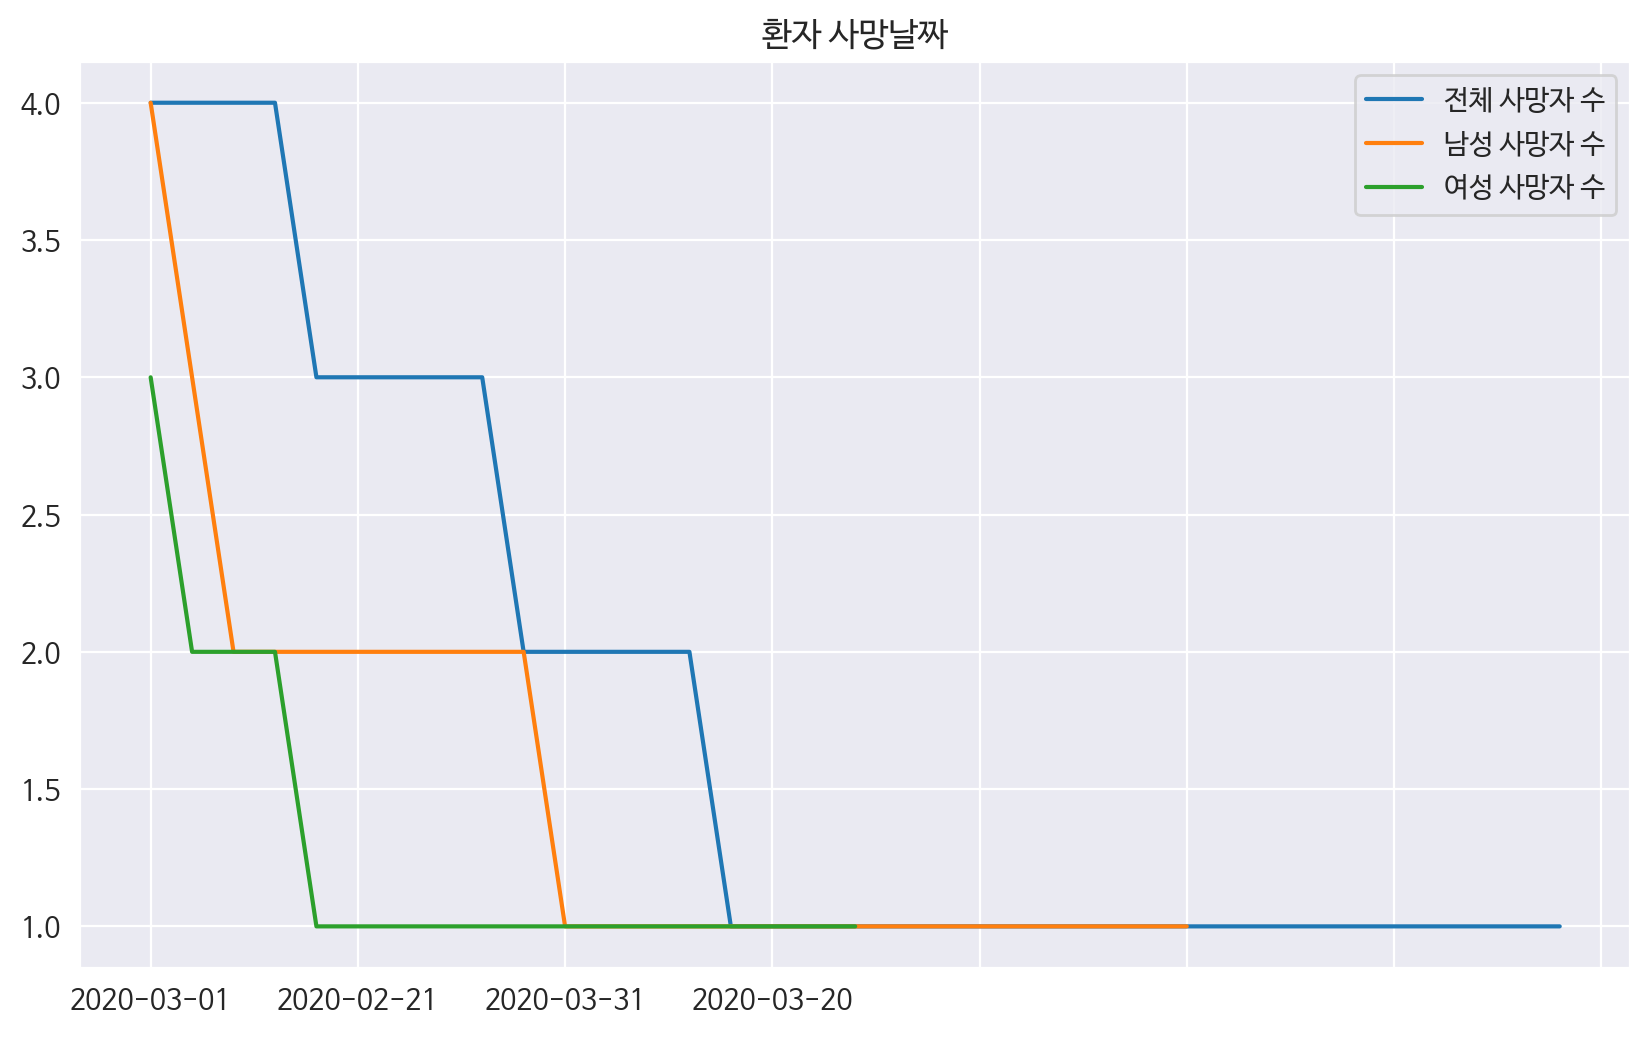

In [45]:
# 버젼 01 - 실패
plt.figure(figsize=(10,6), dpi=100)
plt.rc('font', family='NanumBarunGothic')
plt.title('환자 사망자 수와 사망일')
dead.deceased_date.value_counts().plot(label='전체 사망자 수')
male_dead.deceased_date.value_counts().plot(label='남성 사망자 수')
female_dead.deceased_date.value_counts().plot(label='여성 사망자 수')
plt.legend()
plt.show()

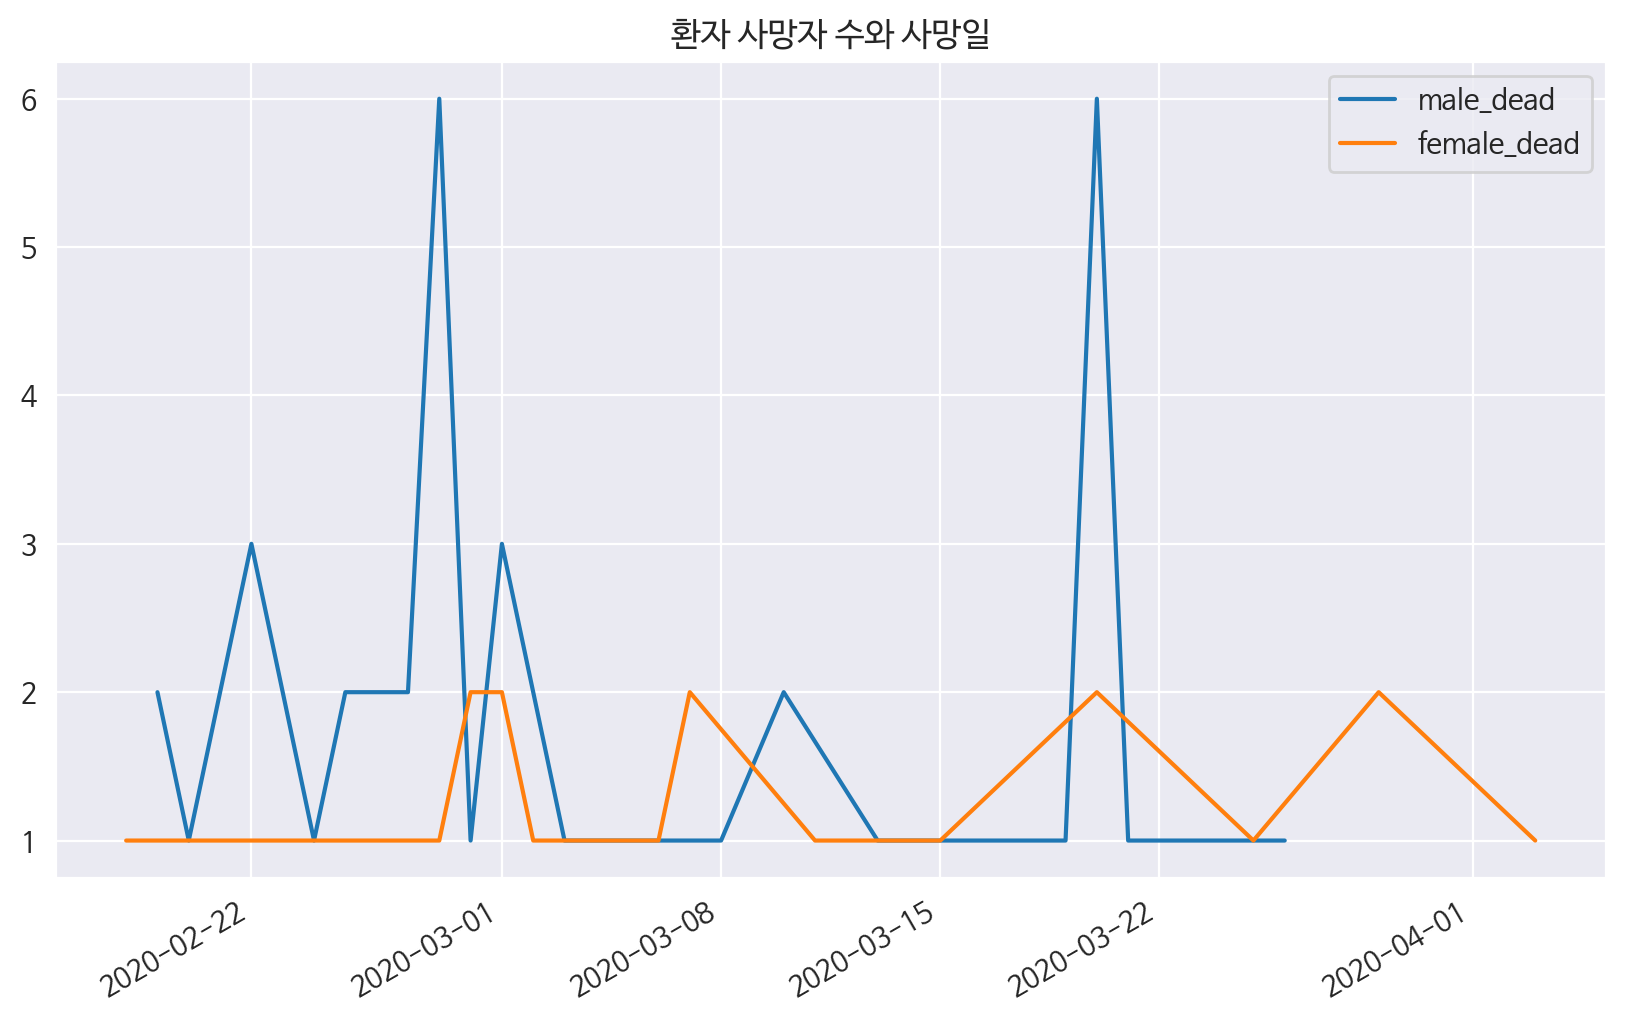

In [53]:
# 버젼 02
plt.figure(figsize=(10,6), dpi=100)
plt.rc('font', family='NanumBarunGothic')
plt.title('환자 사망자 수와 사망일')
# pd.to_datetime(dead.confirmed_date).value_counts().plot(label='dead')
pd.to_datetime(male_dead.confirmed_date).value_counts().plot(label='male_dead')
pd.to_datetime(female_dead.confirmed_date).value_counts().plot(label='female_dead')
plt.legend()
plt.show()